In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Hackaholic/Data/India Agriculture Crop Production Dataset/India Agriculture Crop Production.csv')
data

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [6]:
data.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [ ]:
data=data.drop(['District'],axis=1)

le_season=LabelEncoder()
le_season.fit(data['Season'])
data['Season']=le_season.transform(data['Season'])
season=le_season.classes_

le_pu=LabelEncoder()
le_pu.fit(data['Production Units'])
data['Production Units']=le_pu.transform(data['Production Units'])
production_units=le_pu.classes_
data['Production Units']

area_unit=data['Area Units'].unique()[0]
data=data.drop(['Area Units'],axis=1)
data

,State,Crop,Year,Season,Area,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Arecanut,2001-02,1,1254.0,2061.0,2,1.643541
1,Andaman and Nicobar Islands,Arecanut,2002-03,4,1258.0,2083.0,2,1.655803
2,Andaman and Nicobar Islands,Arecanut,2003-04,4,1261.0,1525.0,2,1.209358
3,Andaman and Nicobar Islands,Arecanut,2001-02,1,3100.0,5239.0,2,1.690000
4,Andaman and Nicobar Islands,Arecanut,2002-03,4,3105.0,5267.0,2,1.696296
...,...,...,...,...,...,...,...,...
345402,Manipur,NaN,2019-20,2,NaN,NaN,2,NaN
345403,Manipur,NaN,2019-20,2,NaN,NaN,2,NaN
345404,Manipur,NaN,2019-20,2,NaN,NaN,2,NaN
345405,Manipur,NaN,2019-20,2,NaN,NaN,2,NaN


In [7]:
years=data['Year'].unique()
crops=data['Crop'].unique()
states=data['State'].unique()

In [8]:
len(crops)

57

State wise Linear Regression

In [ ]:
state_wise_data={}
for st in states:
  temp=data[data['State']==st]
  temp=temp.drop(['State','Year'],axis=1)
  temp=temp.dropna()
  temp=pd.get_dummies(temp,columns=['Crop'])
  state_wise_data[st]=temp
state_wise_data['Tamil Nadu'].info()
del state_wise_data['Laddakh']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18051 entries, 32453 to 335424
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season                    18051 non-null  int64  
 1   Area                      18051 non-null  float64
 2   Production                18051 non-null  float64
 3   Production Units          18051 non-null  int64  
 4   Yield                     18051 non-null  float64
 5   Crop_Arecanut             18051 non-null  uint8  
 6   Crop_Arhar/Tur            18051 non-null  uint8  
 7   Crop_Bajra                18051 non-null  uint8  
 8   Crop_Banana               18051 non-null  uint8  
 9   Crop_Black pepper         18051 non-null  uint8  
 10  Crop_Cardamom             18051 non-null  uint8  
 11  Crop_Cashewnut            18051 non-null  uint8  
 12  Crop_Castor seed          18051 non-null  uint8  
 13  Crop_Coconut              18051 non-null  uint8  
 14  C

In [ ]:
import time
begin=time.time()
model=LinearRegression()
models={}
states_scores={}
for state in state_wise_data:
    target=state_wise_data[state]['Yield']
    predictors=state_wise_data[state].drop(['Yield','Production','Production Units'],axis=1)
    p_train,p_test,t_train,t_test=train_test_split(predictors,target,random_state=123,test_size=0.2)
    models[state]=model.fit(p_train,t_train)
    states_scores[state]=models[state].score(p_test,t_test)
end=time.time()
print('Time taken to train data:',end-begin)

Time taken to train data: 1.4689996242523193


{'Andaman and Nicobar Islands': 0.9529391449922777,
 'Andhra Pradesh': 0.8729870221701841,
 'Arunachal Pradesh': 0.7316152968841123,
 'Assam': 0.6568422306670916,
 'Bihar': 0.5644491410877774,
 'Chandigarh': 0.8482943412490421,
 'Dadra and Nagar Haveli': 0.9365825564357521,
 'Daman and Diu': -0.03207350849276103,
 'Delhi': 0.3001905454137579,
 'Goa': 0.9985103459464056,
 'Gujarat': 0.9271853899117725,
 'Haryana': 0.8443376024720379,
 'Himachal Pradesh': 0.6039779215812169,
 'Jammu and Kashmir': 0.5544239588863473,
 'Jharkhand': 0.7012020856224981,
 'Karnataka': 0.9050552223203445,
 'Kerala': 0.9601503351189016,
 'Madhya Pradesh': 0.6986058055388487,
 'Maharashtra': 0.17331704213992338,
 'Manipur': 0.8687537804750392,
 'Meghalaya': 0.8073013497332813,
 'Mizoram': 0.36824197762588085,
 'Nagaland': 0.9308010759609957,
 'Odisha': 0.9336676063855017,
 'Puducherry': 0.943879173865616,
 'Punjab': 0.9368039203132262,
 'Rajasthan': 0.860400295137074,
 'Sikkim': 0.11405531493773524,
 'Tamil Nadu

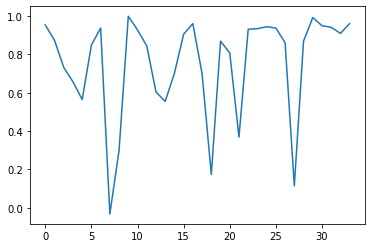

In [ ]:
# for state in state_wise_data:
#     print(state,':',state_wise_data[state].shape)
# # del state_wise_data['Laddakh']
# del states_scores['Chhattisgarh']
plt.plot(states_scores.values())
states_scores

Crops-wise Linear Regression

In [ ]:
crops=np.delete(crops,[-1])
crops

array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
       'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
       'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
       'Dry Ginger', 'Other Summer Pulses'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345407 non-null  int64  
 5   Area              345374 non-null  float64
 6   Production        340414 non-null  float64
 7   Production Units  345407 non-null  int64  
 8   Yield             345374 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 23.7+ MB


In [ ]:
crops_wise_data={}
for cr in crops:
    temp=data[data['Crop']==cr]
    temp=temp.drop(['Crop','Year'],axis=1)
    temp=temp.dropna()
    temp=pd.get_dummies(temp,columns=['State'])
    crops_wise_data[cr]=temp
crops_wise_data['Banana'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4393 entries, 6 to 333662
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Season                             4393 non-null   int64  
 1   Area                               4393 non-null   float64
 2   Production                         4393 non-null   float64
 3   Production Units                   4393 non-null   int64  
 4   Yield                              4393 non-null   float64
 5   State_Andaman and Nicobar Islands  4393 non-null   uint8  
 6   State_Andhra Pradesh               4393 non-null   uint8  
 7   State_Assam                        4393 non-null   uint8  
 8   State_Bihar                        4393 non-null   uint8  
 9   State_Chhattisgarh                 4393 non-null   uint8  
 10  State_Dadra and Nagar Haveli       4393 non-null   uint8  
 11  State_Goa                          4393 non-null   uin

In [ ]:
cropmodel=LinearRegression()
crops_models={}
crops_scores={}
for crop in crops_wise_data:
    target=crops_wise_data[crop]['Yield']
    predictors=crops_wise_data[crop].drop(['Yield','Production','Production Units'],axis=1)
    p_train,p_test,t_train,t_test=train_test_split(predictors,target,random_state=123,test_size=0.2)
    crops_models[crop]=cropmodel.fit(p_train,t_train)
    crops_scores[crop]=crops_models[crop].score(p_test,t_test)
crops_scores

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


{'Arecanut': 0.5896723061145077,
 'Banana': 0.4426694292678056,
 'Black pepper': 0.5348577860619469,
 'Cashewnut': -459.398019479525,
 'Coconut': 0.3237368286358392,
 'Dry chillies': 0.2858012204479351,
 'Ginger': 0.5658431777800796,
 'Other Kharif pulses': 0.15522132659693844,
 'other oilseeds': 0.4686440774067142,
 'Rice': 0.46138017919347696,
 'Sugarcane': 0.6878335232567291,
 'Sweet potato': 0.5171985966483775,
 'Arhar/Tur': 0.005719758396781849,
 'Bajra': 0.35738173091934755,
 'Castor seed': 0.5795563855064059,
 'Coriander': 0.2742356513744384,
 'Cotton(lint)': 0.07922369244404137,
 'Gram': 0.2603478677792215,
 'Groundnut': 0.36038124876920297,
 'Horse-gram': 0.4365799730241122,
 'Jowar': 0.12447948545209375,
 'Linseed': 0.34835664437505665,
 'Maize': 0.005282008619504008,
 'Mesta': 0.40524728482299266,
 'Moong(Green Gram)': 0.3516111587673786,
 'Niger seed': -0.002101343418692947,
 'Onion': 0.3577711083358992,
 'Other Rabi pulses': -0.19897358708834578,
 'Potato': 0.4316824565969

Total Linear Regression

In [ ]:
data=data.dropna()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340414 entries, 0 to 345374
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             340414 non-null  object 
 1   Crop              340414 non-null  object 
 2   Year              340414 non-null  object 
 3   Season            340414 non-null  int64  
 4   Area              340414 non-null  float64
 5   Production        340414 non-null  float64
 6   Production Units  340414 non-null  int64  
 7   Yield             340414 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 23.4+ MB


,State,Crop,Year,Season,Area,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Arecanut,2001-02,1,1254.0,2061.0,2,1.643541
1,Andaman and Nicobar Islands,Arecanut,2002-03,4,1258.0,2083.0,2,1.655803
2,Andaman and Nicobar Islands,Arecanut,2003-04,4,1261.0,1525.0,2,1.209358
3,Andaman and Nicobar Islands,Arecanut,2001-02,1,3100.0,5239.0,2,1.690000
4,Andaman and Nicobar Islands,Arecanut,2002-03,4,3105.0,5267.0,2,1.696296
...,...,...,...,...,...,...,...,...
345370,West Bengal,Wheat,2000-01,2,6310.0,15280.0,2,2.421553
345371,West Bengal,Wheat,1997-98,2,1895.0,2760.0,2,1.456464
345372,West Bengal,Wheat,1998-99,2,3736.0,5530.0,2,1.480193
345373,West Bengal,Wheat,1999-00,2,2752.0,6928.0,2,2.517442


In [ ]:
data=data.drop(['Year'],axis=1)
data2=pd.get_dummies(data,columns=['State','Crop'])
data2.info()
data2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340414 entries, 0 to 345374
Data columns (total 97 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Season                             340414 non-null  int64  
 1   Area                               340414 non-null  float64
 2   Production                         340414 non-null  float64
 3   Production Units                   340414 non-null  int64  
 4   Yield                              340414 non-null  float64
 5   State_Andaman and Nicobar Islands  340414 non-null  uint8  
 6   State_Andhra Pradesh               340414 non-null  uint8  
 7   State_Arunachal Pradesh            340414 non-null  uint8  
 8   State_Assam                        340414 non-null  uint8  
 9   State_Bihar                        340414 non-null  uint8  
 10  State_Chandigarh                   340414 non-null  uint8  
 11  State_Chhattisgarh                 3404

,Season,Area,Production,Production Units,Yield,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
0,1,1254.0,2061.0,2,1.643541,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1258.0,2083.0,2,1.655803,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1261.0,1525.0,2,1.209358,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3100.0,5239.0,2,1.690000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3105.0,5267.0,2,1.696296,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345370,2,6310.0,15280.0,2,2.421553,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
345371,2,1895.0,2760.0,2,1.456464,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
345372,2,3736.0,5530.0,2,1.480193,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
345373,2,2752.0,6928.0,2,2.517442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
model=LinearRegression()
target=data2['Yield']
predictors=data2.drop(['Yield','Production','Production Units'],axis=1)
p_train,p_test,t_train,t_test=train_test_split(predictors,target,random_state=123,test_size=0.2)
model.fit(p_train,t_train)
model.score(p_test,t_test)

0.7862679806717559

In [ ]:
import pickle
reg_file=open('/content/drive/MyDrive/Hackaholic/models.sav','wb')
pickle.dump(models,reg_file)
reg_file.close()